In [12]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.series import Series
from scipy.stats import chisquare, chi2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import sys

sys.path.append("../")

from fast_food_nutrition.analysis import ChiSquaredTest, TTest, ZTest
from fast_food_nutrition.etl import FastFoodMenuETL
from fast_food_nutrition.model import COLOR, FoodIntakeType, FoodNutritionFeatures, FoodNutritionMapping, Nutrition, Sex
from fast_food_nutrition.viz import FastFoodNutritionVisualizer

In [2]:
etl = FastFoodMenuETL()
menu = etl.load_menu_items()
menu.describe()

,calories,fat,carbohydrates,fiber,protein
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,341.264100,14.354969,61.120859,1.844226,13.001611
std,437.434844,27.606401,69.729333,3.961610,20.081804
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,1.000000,24.000000,0.000000,3.000000
50%,270.000000,7.000000,41.000000,1.000000,9.000000
75%,450.000000,21.000000,65.000000,2.000000,18.000000
max,9850.000000,624.000000,616.000000,63.000000,442.000000


In [3]:
menu.dtypes

menu_item        string[python]
calories                float64
fat                     float64
carbohydrates           float64
fiber                   float64
protein                 float64
dtype: object

In [4]:
menu

,menu_item,calories,fat,carbohydrates,fiber,protein
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1112,Crispy Bell Peppers,80.0,6.0,6.0,0.0,1.0
1113,Harvest Nut Granola,70.0,2.0,10.0,0.0,1.0
1114,Seasoned Tortilla Strips,70.0,4.0,8.0,1.0,1.0
1115,Lemon Parmesan Panko,0.0,0.0,0.0,0.0,0.0


In [5]:
len(menu['menu_item'].unique())

991

In [6]:
menu = menu.drop_duplicates(keep='last')

In [7]:
len(menu)

1096

In [8]:
duplicate_menu_items = menu.duplicated(subset='menu_item', keep=False)
for _, item in menu[duplicate_menu_items].iterrows():
    print(item['menu_item'])

Iced Coffee
Iced Coffee
Chocolate Chip Cookie
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Cappuccino 2% Milk
Cappuccino Soymilk
Cappuccino 2

In [9]:
menu.set_index('menu_item', inplace=True)

In [10]:
len(menu)

1096

## Scatterplots

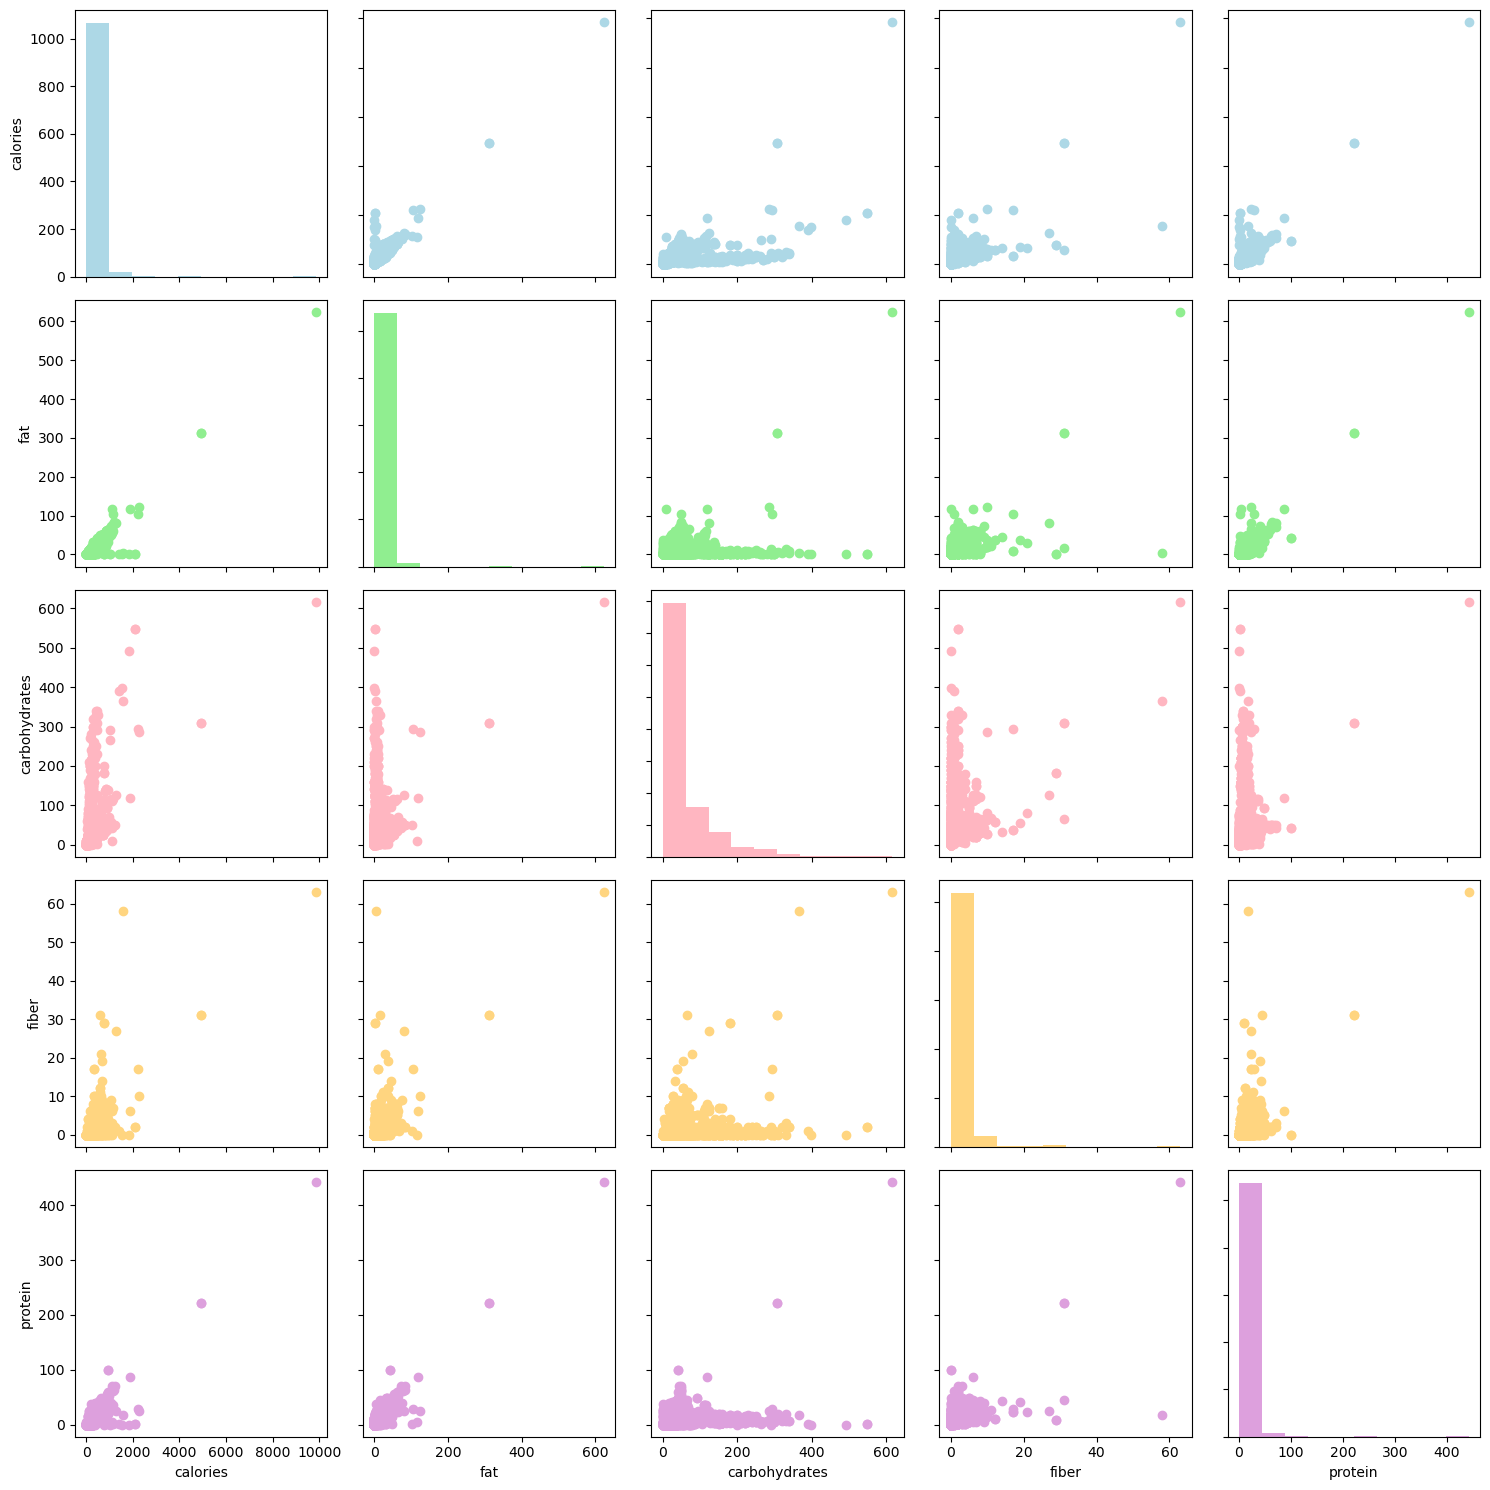

In [11]:
FastFoodNutritionVisualizer.generate_scatter_plots(menu)

In [95]:
## Boxplots

In [101]:
scaler = MinMaxScaler()

menu_scaled = pd.DataFrame(scaler.fit_transform(menu), columns=menu.columns, index=menu.index)
menu_scaled

,calories,fat,carbohydrates,fiber,protein
menu_item,,,,,
Cool Lime Starbucks Refreshers™ Beverage,0.004569,0.000000,0.017857,0.000000,0.000000
Strawberry Acai Starbucks Refreshers™ Beverage,0.008122,0.000000,0.029221,0.015873,0.000000
Very Berry Hibiscus Starbucks Refreshers™ Beverage,0.006091,0.000000,0.022727,0.015873,0.000000
Evolution Fresh™ Organic Ginger Limeade,0.011168,0.000000,0.045455,0.000000,0.000000
Iced Coffee,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
Crispy Bell Peppers,0.008122,0.009615,0.009740,0.000000,0.002262
Harvest Nut Granola,0.007107,0.003205,0.016234,0.000000,0.002262
Seasoned Tortilla Strips,0.007107,0.006410,0.012987,0.015873,0.002262


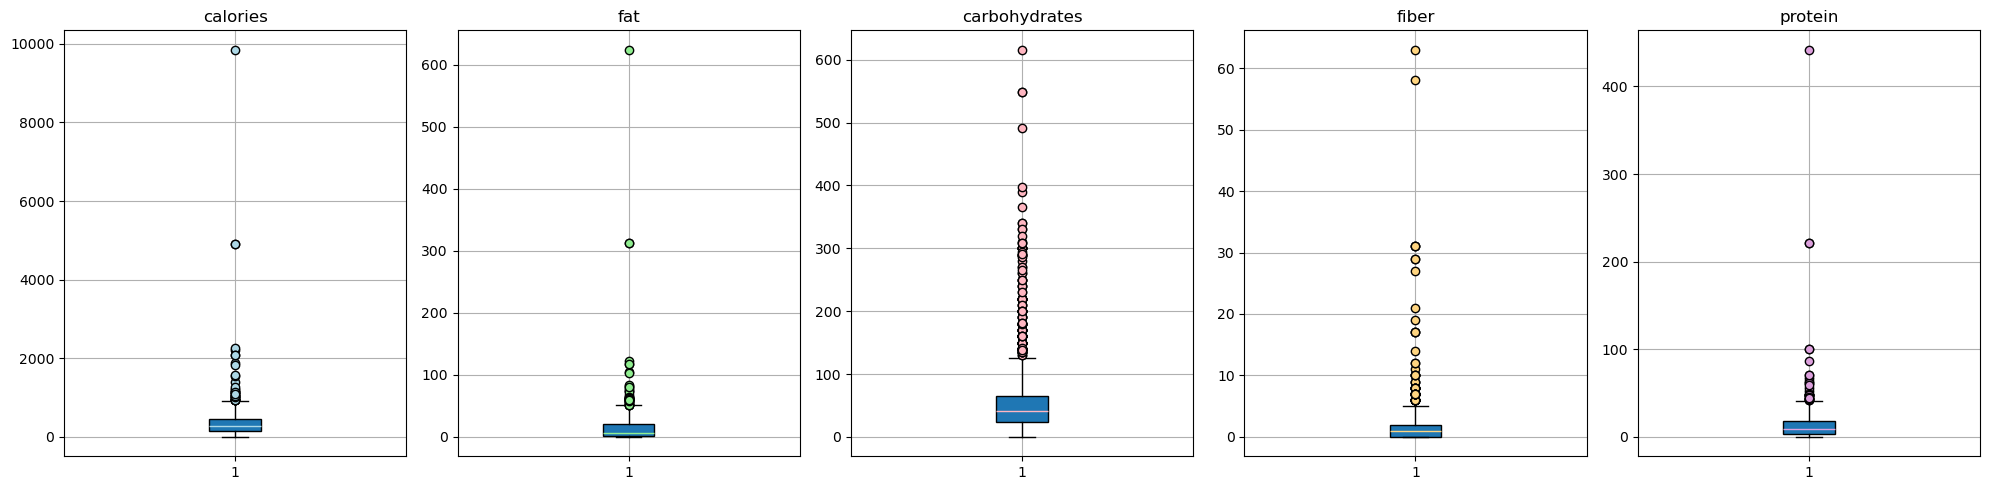

In [103]:
FastFoodNutritionVisualizer.generate_box_plot(menu)

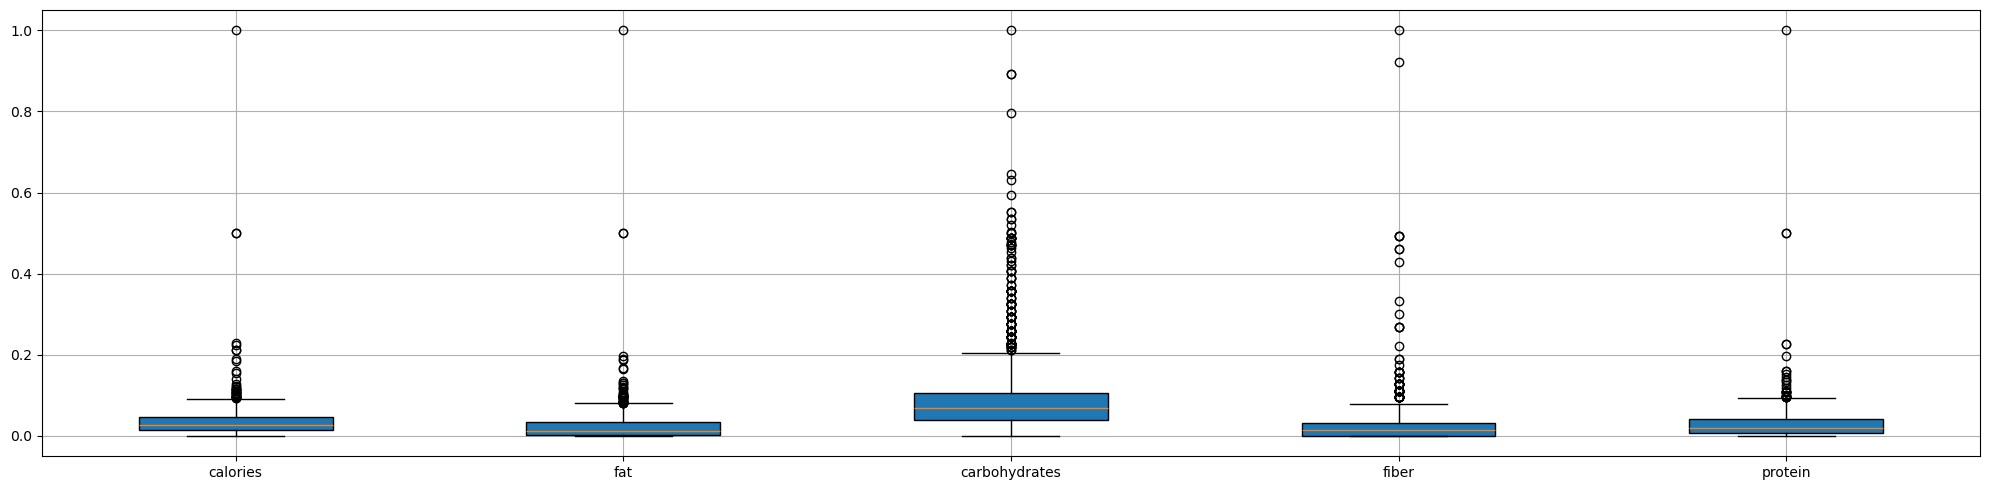

In [104]:
FastFoodNutritionVisualizer.generate_box_plot(menu_scaled, merge=True)

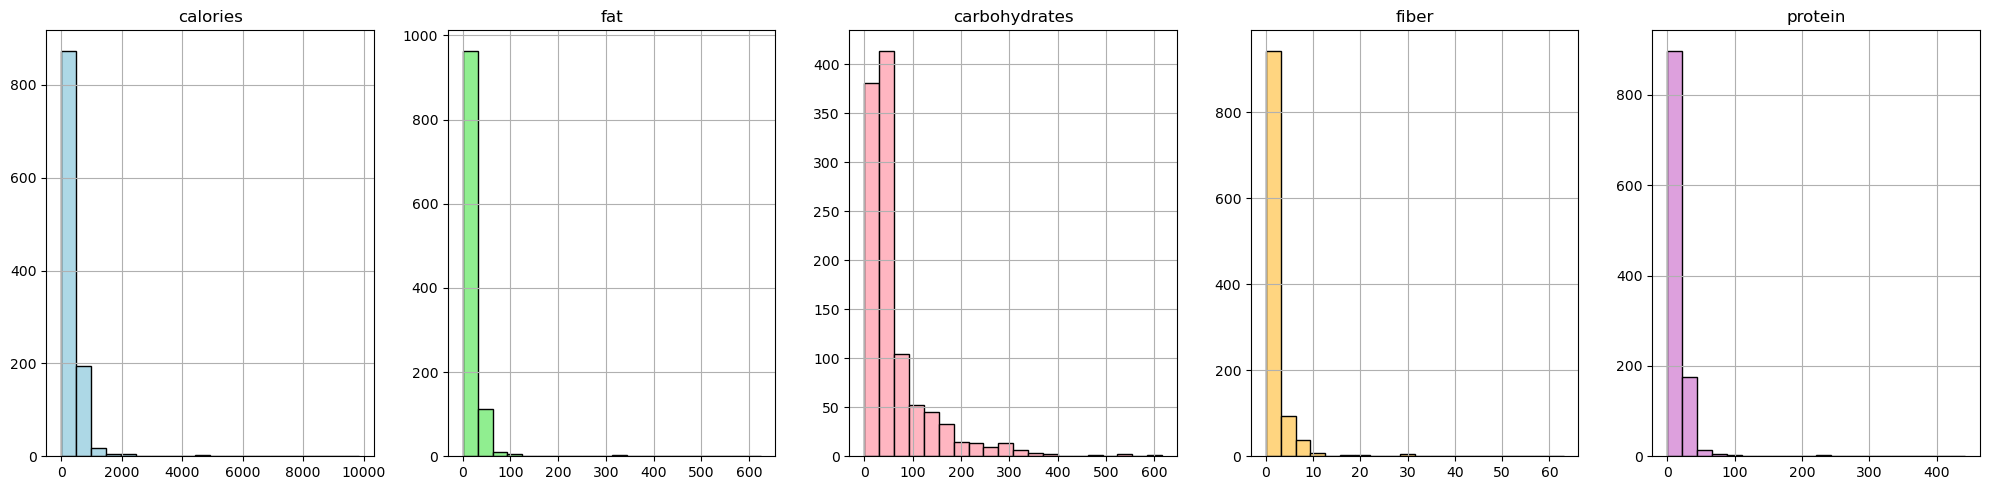

In [105]:
FastFoodNutritionVisualizer.generate_histogram_plots(menu)

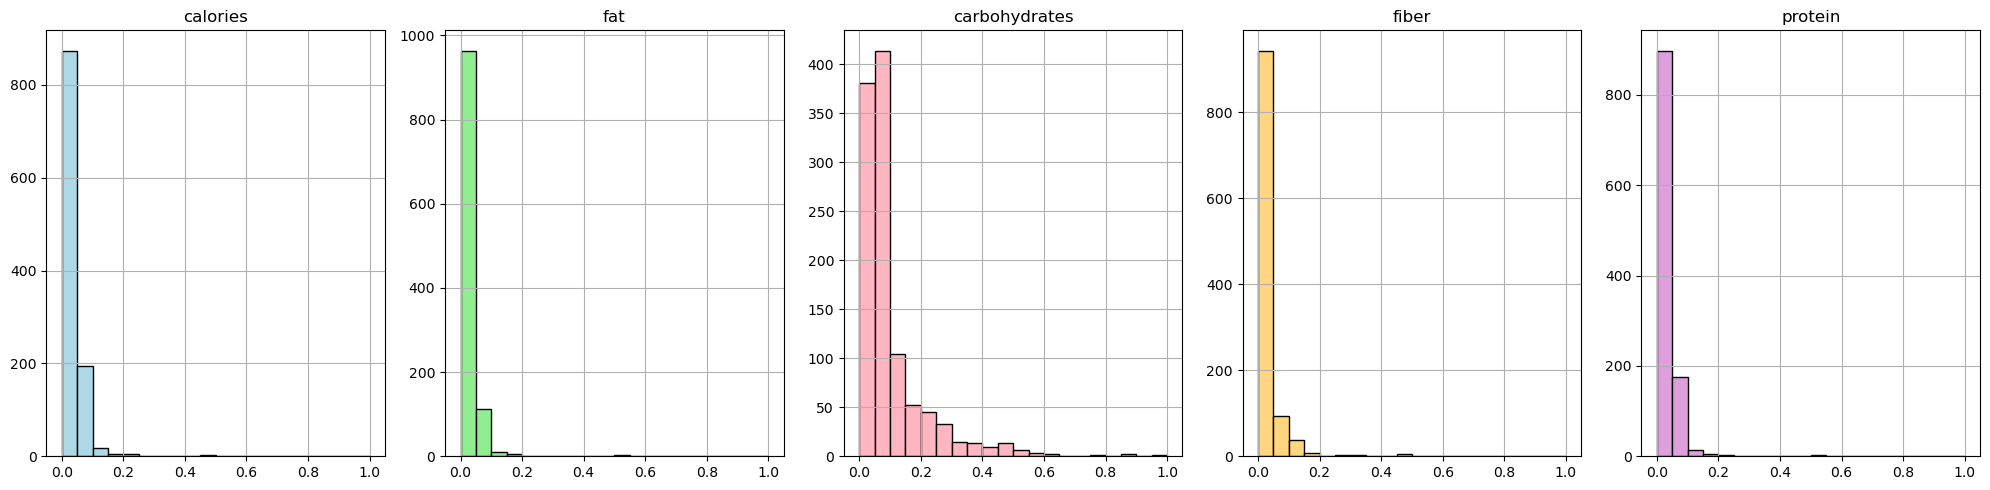

In [106]:
FastFoodNutritionVisualizer.generate_histogram_plots(menu_scaled)

## Calories Claims

#### Lets make a claim that more than 50% of the fast foods in the U.S. have more than 270 calories, 
#### which is the median amount of calories for the various
#### menu items in our data sample.  The actual value in our sample is as follows:

In [9]:
calories_greater_than_270 = len(menu[menu['calories'] > 270])
unique = menu.index.nunique()
percentage_calories_greater_than_270 = round((calories_greater_than_270 / menu.index.nunique()) * 100, 2)

In [10]:
print(f"The total number of unique food items on the menu are {unique} and the total number of "
f"food items that have more than 270 calories are {calories_greater_than_270} out of {unique} "
f"for percentage of {percentage_calories_greater_than_270}%.")

The total number of unique food items on the menu are 1117 and the total number of food items that have more than 270 calories are 547 out of 1117 for percentage of 48.97%.


In [11]:
level_of_significance=0.05
p0 = 0.5
phat = percentage_calories_greater_than_270
z, p_value = ZTest.calculate(p0, phat, unique, level_of_significance)
print(f"Critical Value: {z} and P-Value: {p_value}")

Critical Value: 73.78680029858623 and P-Value: 0.0


#### There is sufficient evidence that more than 50% of the fast foods in the U.S. have more than 270 calories.

In [12]:
print(f"Lets make a claim that mean number of calories for fast foods in the U.S is greater than {round(menu['calories'].mean(), 2)}.")

Lets make a claim that mean number of calories for fast foods in the U.S is greater than 341.26.


In [13]:
x_bar = menu['calories'].mean()
mu_0 = 0
n = unique
s = menu['calories'].std()

In [14]:
t, p_value = TTest.calculate(x_bar, mu_0, n, s)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 26.073769200858795 and P-Value: 1.0054447919253665e-117


#### There is sufficient evidence that the mean number of calories for fast foods in the U.S is greater than 341.26.

In [21]:
print(f"Lets make a claim that standard deviation for the number of calories for fast foods in the U.S is greater than {round(menu['calories'].std(), 2)}.")

Lets make a claim that standard deviation for the number of calories for fast foods in the U.S is greater than 437.43.


In [22]:
n = unique
s = menu['calories'].std()
sigma_0 = 400

In [23]:
chi_squared, p_value = ChiSquaredTest.calculate(n, s, sigma_0)
print(f"Critical Value: {chi_squared} and P-Value: {p_value}")

Critical Value: 1334.6609693151302 and P-Value: 6.201217281795558e-06


#### There is sufficient evidence that standard deviation for the number of calories for fast foods in the U.S is greater than 400.

## Fat Claim

#### Lets make a claim that more that 50% of the fast foods in the U.S. have more than 1 grams of fat, which is the median amount 
#### of fat for the various menu items in our data sample.  The actual value in our sample is as follows:

In [15]:
fat_greater_than_7 = len(menu[menu['fat'] > 7])
unique = menu.index.nunique()
percentage_fat_greater_than_7 = round((fat_greater_than_7 / unique) * 100, 2)

In [16]:
print(f"The total number of unique fast food items on the menu are {unique} and the total number of "
f"food items that have more than 1 gram are {fat_greater_than_7} out of {unique} for percentage of {percentage_fat_greater_than_7}%.")

The total number of unique fast food items on the menu are 1117 and the total number of food items that have more than 1 gram are 545 out of 1117 for percentage of 48.79%.


In [17]:
level_of_significance=0.05
p0 = 0.5
phat = percentage_fat_greater_than_7
z, p_value = ZTest.calculate(p0, phat, unique, level_of_significance)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 26.073769200858795 and P-Value: 0.0


#### There is sufficient evidence that more than 50% of the fast foods in the U.S. have more than 1 grams of fat.

In [18]:
print(f"Lets make a claim that mean number of calories for fast foods in the U.S is greater than {round(menu['fat'].mean(), 2)}.")

Lets make a claim that mean number of calories for fast foods in the U.S is greater than 14.35.


In [19]:
x_bar = menu['fat'].mean()
mu_0 = 0
n = unique
s = menu['fat'].std()

In [20]:
t, p_value = TTest.calculate(x_bar, mu_0, n, s)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 17.378770544213857 and P-Value: 2.3386243713171251e-60


In [26]:
print(f"Lets make a claim that standard deviation for the number of grams of fat for fast foods in the U.S is greater than {round(menu['fat'].std(), 2)}.")

Lets make a claim that standard deviation for the number of grams of fat for fast foods in the U.S is greater than 27.61.


In [27]:
n = unique
s = menu['fat'].std()
sigma_0 = 25

In [28]:
chi_squared, p_value = ChiSquaredTest.calculate(n, s, sigma_0)
print(f"Critical Value: {chi_squared} and P-Value: {p_value}")

Critical Value: 1360.8296078782457 and P-Value: 5.89039871914537e-07


In [30]:
#### There is sufficient evidence that the standard deviation for the number of grams for fast foods in the U.S is greater than 25.

## Carbohydrates Claim

#### Since calories accounts for the highest weight in our model we will be a claim around this food nutrient.  Lets make a claim that more
#### than 50% of the fast foods in the U.S. have more than 41 carbs, which is the median amount of carbohydrates for the various
#### menu items in our data sample.  The actual value in our sample is as follows:

carbs_greater_than_41 = len(menu[menu['carbohydrates'] > 41])
unique = menu.index.nunique()
percentage_carbs_greater_than_41 = round((carbs_greater_than_41 / unique) * 100, 2)

In [19]:
print(f"The total number of unique fast food items on the menu are {unique} and the total number of "
f"food items that have more than 41 carbs are {carbs_greater_than_41} out of {unique} for percentage of {percentage_carbs_greater_than_41}%.")

The total number of unique fast food items on the menu are 1117 and the total number of food items that have more than 41 carbs are 558 out of 1117 for percentage of 49.96%.


In [20]:
level_of_significance=0.05
p0 = 0.5
phat = percentage_carbs_greater_than_41
z, p_value = ZTest.calculate(p0, phat, unique, level_of_significance)
print(f"Critical Value: {z} and P-Value: {p_value}")

Critical Value: 75.2938960752646 and P-Value: 0.0


#### There is sufficient evidence that more than 50% of the fast foods in the U.S. have more than have more than 41 carbs.

In [51]:
print(f"Lets make a claim that mean number of carbs for fast foods in the U.S is greater than {round(menu['carbohydrates'].mean(), 2)}.")

Lets make a claim that mean number of carbs for fast foods in the U.S is greater than 61.12.


In [52]:
x_bar = menu['carbohydrates'].mean()
mu_0 = 0
n = unique
s = menu['carbohydrates'].std()

In [53]:
t, p_value = TTest.calculate(x_bar, mu_0, n, s)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 29.295474083738018 and P-Value: 1.0536359414314108e-140


#### There is sufficient evidence that the mean number of carbs for fast foods in the U.S is greater than 61.12.

In [31]:
print(f"Lets make a claim that standard deviation for the number of carbs for fast foods in the U.S is greater than {round(menu['carbohydrates'].std(), 2)}.")

Lets make a claim that standard deviation for the number of carbs for fast foods in the U.S is greater than 69.73.


In [39]:
n = unique
s = menu['carbohydrates'].std()
sigma_0 = 65

In [40]:
chi_squared, p_value = ChiSquaredTest.calculate(n, s, sigma_0)
print(f"Critical Value: {chi_squared} and P-Value: {p_value}")

Critical Value: 1284.305960704126 and P-Value: 0.0003229069600801021


In [34]:
#### There is sufficient evidence that the standard deviation for the number of carbs for fast foods in the U.S is greater than 65.

## Fiber Claim

#### Lets make a claim that more than 50% of the fast foods in the U.S. have more than 41 grams of fiber, which is the median 
#### amount of fiber for the various menu items in our data sample.  The actual value in our sample is as follows:

In [21]:
fiber_greater_than_1 = len(menu[menu['fiber'] > 1])
unique = menu.index.nunique()
percentage_fiber_greater_than_1 = round((fiber_greater_than_1 / unique) * 100, 2)

In [22]:
print(f"The total number of unique food items on the menu are {unique} and the total number of "
f"food items that have more than 1 gram of fiber are {fiber_greater_than_1} out of {unique} for percentage of {percentage_fiber_greater_than_1}%.")

The total number of unique food items on the menu are 1117 and the total number of food items that have more than 1 gram of fiber are 414 out of 1117 for percentage of 37.06%.


In [23]:
level_of_significance=0.05
p0 = 0.5
phat = percentage_fiber_greater_than_1
z, p_value = ZTest.calculate(p0, phat, unique, level_of_significance)
print(f"Critical Value: {z} and P-Value: {p_value}")

Critical Value: 55.6559814094556 and P-Value: 0.0


#### There is sufficient evidence that more than 50% of the fast foods in the U.S. have more than 1 gram of fiber.

In [56]:
print(f"Lets make a claim that mean number of grams of fat for fast foods in the U.S is greater than {round(menu['fiber'].mean(), 2)}.")

Lets make a claim that mean number of grams of fat for fast foods in the U.S is greater than 1.84.


In [57]:
x_bar = menu['fiber'].mean()
mu_0 = 0
n = unique
s = menu['fiber'].std()

In [58]:
t, p_value = TTest.calculate(x_bar, mu_0, n, s)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 15.558544232641792 and P-Value: 7.517284893555398e-50


In [59]:
#### There is sufficient evidence that the mean number of grams of fiber for fast foods in the U.S is greater than 1.84.

In [41]:
print(f"Lets make a claim that standard deviation for the number of grams of fiber for fast foods in the U.S is greater than {round(menu['fiber'].std(), 2)}.")

Lets make a claim that standard deviation for the number of grams of fiber for fast foods in the U.S is greater than 3.96.


In [43]:
n = unique
s = menu['fiber'].std()
sigma_0 = 3

In [44]:
chi_squared, p_value = ChiSquaredTest.calculate(n, s, sigma_0)
print(f"Critical Value: {chi_squared} and P-Value: {p_value}")

Critical Value: 1946.0994727941907 and P-Value: 7.199392067166078e-48


#### There is sufficient evidence that the standard deviation for the number of grams fo fiber for fast foods in the U.S is greater than 3.

## Protein Claim

#### Lets make a claim that more than 50% of the fast foods in the U.S. have more than 8 grams of protein, which is the median 
#### amount of protein for the various menu items in our data sample.  The actual value in our sample is as follows:

In [24]:
protein_greater_than_8 = len(menu[menu['protein'] > 8])
unique = menu.index.nunique()
percentage_protein_greater_than_8 = round((protein_greater_than_8 / unique) * 100, 2)

In [25]:
print(f"The total number of unique food items on the menu are {unique} and the total number of "
f"food items that have more than 1 gram of fiber are {protein_greater_than_8} out of {unique} for percentage of {percentage_protein_greater_than_8}%.")

The total number of unique food items on the menu are 1117 and the total number of food items that have more than 1 gram of fiber are 576 out of 1117 for percentage of 51.57%.


In [26]:
level_of_significance=0.05
p0 = 0.5
phat = percentage_protein_greater_than_8
z, p_value = ZTest.calculate(p0, phat, unique, level_of_significance)
print(f"Critical Value: {z} and P-Value: {p_value}")

Critical Value: 77.74482961107486 and P-Value: 0.0


#### There is sufficient evidence that more than 50% of the fast foods in the U.S. have more than 8 grams of protein.

In [61]:
print(f"Lets make a claim that mean number of grams of protein for fast foods in the U.S is greater than {round(menu['protein'].mean(), 2)}.")

Lets make a claim that mean number of grams of protein for fast foods in the U.S is greater than 13.0.


In [62]:
x_bar = menu['protein'].mean()
mu_0 = 0
n = unique
s = menu['protein'].std()

In [63]:
t, p_value = TTest.calculate(x_bar, mu_0, n, s)
print(f"Critical Value: {t} and P-Value: {p_value}")

Critical Value: 21.638196301721067 and P-Value: 2.7644938060486843e-87


#### There is sufficient evidence that the mean number of grams of protein for fast foods in the U.S is greater than 13.0.

In [46]:
print(f"Lets make a claim that standard deviation for the number of grams of protein for fast foods in the U.S is greater than {round(menu['protein'].std(), 2)}.")

Lets make a claim that standard deviation for the number of grams of protein for fast foods in the U.S is greater than 20.08.


In [50]:
n = unique
s = menu['protein'].std()
sigma_0 = 20

In [51]:
chi_squared, p_value = ChiSquaredTest.calculate(n, s, sigma_0)
print(f"Critical Value: {chi_squared} and P-Value: {p_value}")

Critical Value: 1125.1479427484333 and P-Value: 0.41792401710668126


#### There is sufficient evidence that the standard deviation for the number of grams fo protein for fast foods in the U.S is greater than 20.

# Modeling

In [ ]:
x = menu[[]]

In [ ]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(